## DSCI100 Final Project:

## Prediction of presence of heart disease based on Serum Cholestoral and Age ##

**Introduction**
 
  Heart disease is one of the crucial health issues that affect people worldwide, leading to significant concerns. Heart disease has been associated with death for a long period of time. According to American Heart Association News, about one million cases are diagnosed as heart disease every year in America (American Heart Association, 2019). Many patients  struggling with heart issues have received effective treatments, significantly improving their outcomes and reducing the mortality rate . As a result, identifying risky medical and demographic factors for early detection is significant. The dataset used for this project is called “Heart Disease'' from UC Irvine Machine Learning Repository . It contains four databases and main features include sex, age, cp, chol, etc. The dataset contains 4 types from different regions: Cleveland, Hungary, Switzerland, and the VA Long Beach. Only "Cleveland '' dataset will be used here, with each row representing observation of one patient. 

Mayo Clinic once published an article discussing how serum cholestoral level could impact the risk of heart attack by causing a potential restriction of blood flow (High cholesterol, 2023) . Therefore, we are wondering the significance of serum cholestoral level in affecting heart disease risk. This project is aiming to predict the likelihood of heart disease by exploring specific factors, namely age and serum cholestoral. The target variable is heart disease, whether present or absent. 

The predictive question for this project is: “Can serum cholestoral and age accurately predict the presence of heart disease by using classification model?” 




**Methodology**

KNN classification is the algorithm that I will employ to predict the presence of heart disease. This algorithm is effective and straightforward to identify new observations by analysing quantitative data. The choice of value”k” is crucial, so we will perform cross-validation to find the optimal “k” number to balance data. Additionally, I will use a scatter plot to visualize the relationship between predictor variables(serum cholestoral and age). For the final analysis, plotting the confusion matrix is also necessary as it performs the overview of the model and tests the accuracy of the classification model. 

**Expected outcomes and significance**

This project expects to develop a model that can predict the presence of heart disease based on serum cholestoral type and age. The purpose of this model is to help the early detection of heart disease for health system, thereby helping more people and high risk patients who are struggling with the disease. 



In [1]:
library(tidyverse)
library(tidymodels)
library(readr)
library(utils)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

**Reading data**

To start with, we need to create our own repository, and clone the school repository in order to get the data to our local computer. Now we can directly use the “read_csv” function to read the dataset into R. To get a clean dataset, selecting necessary columns is important. We mutate a new column “Presc” to indicate the presence of heart disease with “True” or “False”, and then apply “select” argument to choose needed columns: age (Age), chol (serum cholestoral), num (Diagnosis of Heart Disease), presc (Presence). 



In [2]:
# Read the data we need from web into R; the dataset I choose is "Cleveland" dataset.

heart_disease_data <- read_csv("data/heart_disease/processed.cleveland.data",
                               c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"))

heart_disease_data[ heart_disease_data == "?" ] <- NA

# Select necessary variables; this step is used for cleaning and wrangling the data into tidy format.
heart_disease_data1 <- heart_disease_data |>
  mutate(presc = ifelse(is.na(num), NA, (num > 0))) |>
  filter(!is.na(presc)) |>
  mutate(presc = as_factor(presc)) |>
  select(age, chol, num, presc)

# Display data as a table.
heart_disease_data1


Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,chol,num,presc
<dbl>,<dbl>,<dbl>,<fct>
63,233,0,FALSE
67,286,2,TRUE
67,229,1,TRUE
37,250,0,FALSE
41,204,0,FALSE
56,236,0,FALSE
62,268,3,TRUE
57,354,0,FALSE
63,254,2,TRUE


**Creating training and testing data**

Second step is to split datasets into two sets: training and testing. Using the “prop” argument, 75% of the dataset will be classified as a training data, and the other 25% will be classified as a testing data. Notice that we stratified the split of the dataset is based on the “presc” column to ensure these sets are proportionally splitting based on the presence of the disease. All the steps we’ve done previously were in preparation for k-nearest neighbors classification.



In [3]:
set.seed(3456)

heart_disease_split <- initial_split(heart_disease_data1, prop = 0.75, strata = presc)
heart_disease_train <- training(heart_disease_split)
heart_disease_test <- testing(heart_disease_split)

# Display both training and testing sets
head(heart_disease_train)
head(heart_disease_test)

age,chol,num,presc
<dbl>,<dbl>,<dbl>,<fct>
63,233,0,FALSE
37,250,0,FALSE
44,263,0,FALSE
52,199,0,FALSE
57,168,0,FALSE
54,239,0,FALSE


age,chol,num,presc
<dbl>,<dbl>,<dbl>,<fct>
41,204,0,FALSE
56,236,0,FALSE
57,354,0,FALSE
63,254,2,TRUE
53,203,1,TRUE
57,192,0,FALSE


**Creating scatter plot**

Next, we can visualize the training set (notice we should put the testing set aside because the testing set is only used for final analysis) by plotting a scatter graph. We will select age and serum cholestoral columns as x and y axes by applying the “geom_point” argument to the data. This step helps us virtually display the relationship between these two predictors. 



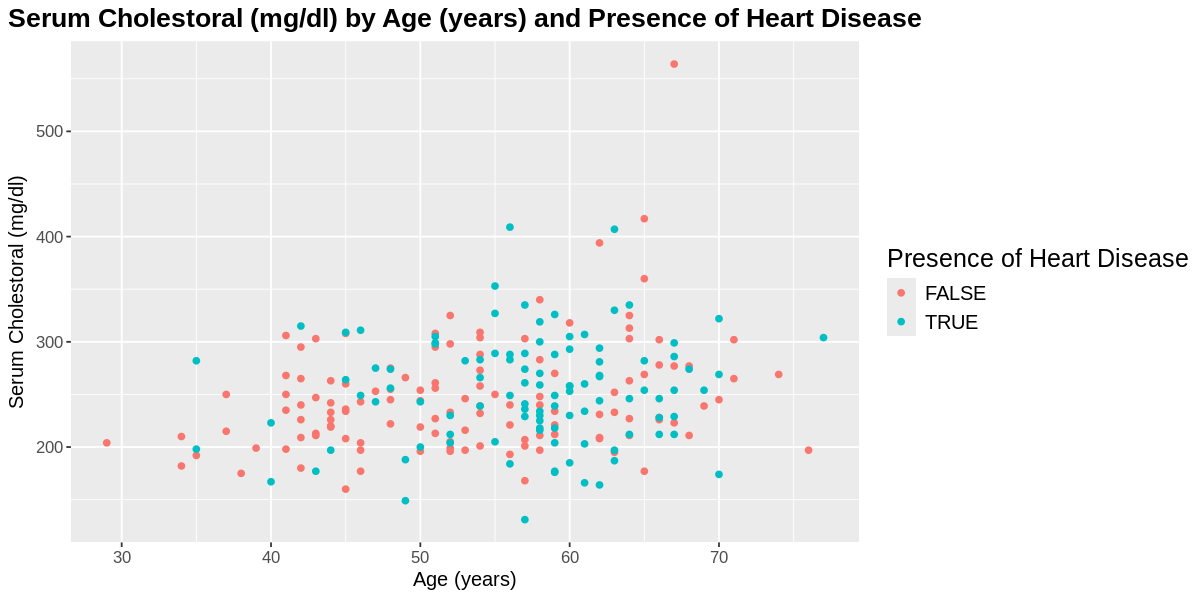

In [4]:
# Now, we can put test set aside, 
# and use only training set to create scatter plot in order to visualize the relationship between "Age" and "Serum Cholestoral". 

options(repr.plot.width = 10, repr.plot.height = 5)

heart_disease_gg <- ggplot(heart_disease_train, aes(x = age, y = chol, colour = presc)) +
    geom_point() +
    labs(x = "Age (years)", y = "Serum Cholestoral (mg/dl)", colour = "Presence of Heart Disease") +
    theme(text = element_text(size=15), 
          plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
         axis.title = element_text(size = 12),
    axis.text = element_text(size = 10)) +
    labs(title = "Serum Cholestoral (mg/dl) by Age (years) and Presence of Heart Disease")

heart_disease_gg
    


From the scatter plot we obtained, it seems that the relationship between age and serum cholestoral is not strong. 

**Set up Cross-validation/ Standardizing / Specify model**

Now that we are ready to use KNN algorithm, how do we know which k value should we obtain? To find the optimal value of k, we will perform 5-fold cross-validation. Before standardizing the training data, we first need to use "vfold_cv" to separate training data into five folds. When we specify the model, applying the “neighbors = tune()” function to help us find out the best k value. Then, we create a tibble in order to test sequence of number from 1 to 100, with steps of 5. 



In [28]:
set.seed(2020)

#Create 5-folds cross-validation object
heart_vfold <- vfold_cv(heart_disease_train, v = 5, strata = presc)

#Standardize data
heart_recipe <- recipe(presc ~ age + chol, data = heart_disease_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())



#Create model
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
     set_engine("kknn") |>
     set_mode("classification")

heart_recipe
knn_tune

k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 2



── Operations 

• Scaling for: all_predictors()

• Centering for: all_predictors()



K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


**Set up Workflow**

To create workflow, we use "tune_grid" function to fit the parameters values of the model. Then,  we apply the “collect_metrics” function to collect the accuracy calculation among all five folds. The best value of k is depending on the greatest value of mean, therefore, we need to filter out every row that contains “accuracy” under the ".metrics” column.



In [32]:
#Set up workflow
set.seed(2020)
knn_results <- workflow() |>
  add_recipe(heart_recipe) |>
  add_model(knn_tune) |>
  tune_grid(resamples = heart_vfold, grid = k_vals) |>
  collect_metrics()

knn_results

#Filter our the result of accuracy to clearly identify the greatest mean value
accuracies <- knn_results |>
  filter(.metric == "accuracy") 


accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.5067589,5,0.04175092,Preprocessor1_Model01
1,roc_auc,binary,0.5040952,5,0.04042221,Preprocessor1_Model01
6,accuracy,binary,0.5459859,5,0.03379325,Preprocessor1_Model02
6,roc_auc,binary,0.6068313,5,0.03261887,Preprocessor1_Model02
11,accuracy,binary,0.5855160,5,0.04175977,Preprocessor1_Model03
11,roc_auc,binary,0.6290456,5,0.03911842,Preprocessor1_Model03
16,accuracy,binary,0.5813658,5,0.02410665,Preprocessor1_Model04
16,roc_auc,binary,0.6402302,5,0.01520896,Preprocessor1_Model04
21,accuracy,binary,0.5898595,5,0.01770891,Preprocessor1_Model05


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.5067589,5,0.04175092,Preprocessor1_Model01
6,accuracy,binary,0.5459859,5,0.03379325,Preprocessor1_Model02
11,accuracy,binary,0.5855160,5,0.04175977,Preprocessor1_Model03
16,accuracy,binary,0.5813658,5,0.02410665,Preprocessor1_Model04
21,accuracy,binary,0.5898595,5,0.01770891,Preprocessor1_Model05
26,accuracy,binary,0.6251339,5,0.01635386,Preprocessor1_Model06
31,accuracy,binary,0.6203909,5,0.02657848,Preprocessor1_Model07
36,accuracy,binary,0.6161440,5,0.02077367,Preprocessor1_Model08
41,accuracy,binary,0.6296706,5,0.03023196,Preprocessor1_Model09


From the resulting table, it seems hard to find the best k value. Thus, we can create a line graph to help us visualize the trend for all k values, with x-axis represents k value and y-axis represents estimated accuracy. To find the best k value based on the highest accuracy, filter the accuracy row by arranging "mean" column in decreasing order and using "head(1)" to get the highest accuracy. 


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
91,accuracy,binary,0.6340228,5,0.02189851,Preprocessor1_Model19


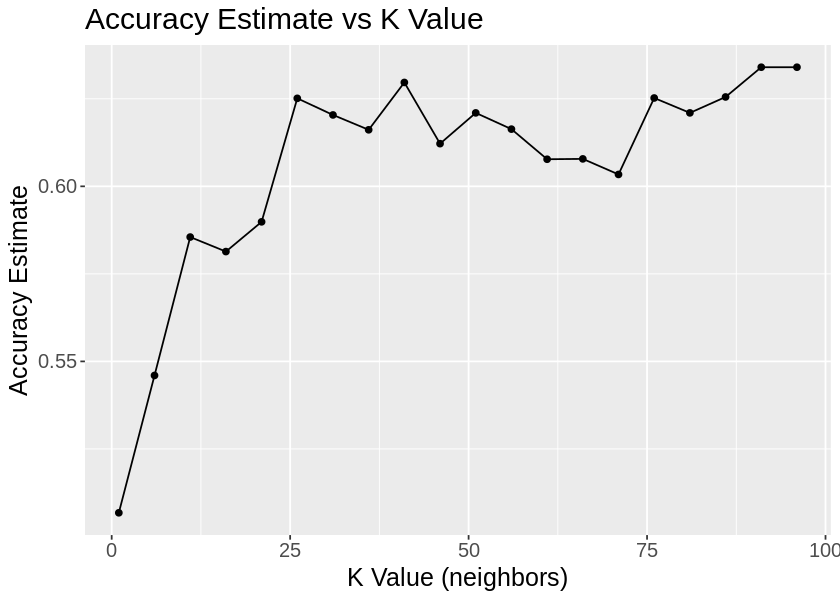

In [33]:
#Create line graph

options(repr.plot.width = 7, repr.plot.height = 5)

accuracy_and_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "K Value (neighbors)", y = "Accuracy Estimate", title = "Accuracy Estimate vs K Value") +
  theme(text = element_text(size = 15)) 

accuracy_and_k

#Find the optimal value of k

accuracies <- knn_results |>
  filter(.metric == "accuracy") |>
  arrange(desc(mean)) |>
  head(1)

accuracies

From the line graph, we can see that when k = 91 , the accuracy of cross-validation is the highest. As a result, we will use neighbors = 91 to set another KNN model, as well as a new workflow for the final analysis. After set up, we can see R told us that the minimal misclassification is around 0.3832599, which means the accuracy of heart disease prediction is approximately 62%. 


In [38]:
#Create new workflow and specify model by using k = 91
set.seed(2020)
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 91) |>
            set_engine("kknn") |>
            set_mode("classification")

heart_disease_fit_final <- workflow() |>
  add_recipe(heart_recipe) |>
  add_model(knn_spec) |>
  fit(data = heart_disease_train)

heart_disease_fit_final

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(91,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.3832599
Best kernel: rectangular
Best k: 91

**Final analysis**

The last step is to use “predict” argument to make predictions about the testing dataset. The “bind_cols” argument will help us add a new column of predictions to the original data. In order to visualize the resulting predictions, we need to analyze estimated data by applying “metric” function. After filtering out the “accuracy” under the ".metric” column, we can clearly observe the proportion of correctness.  To take a closer look at which labels in the test set are predicted correctly, the “conf_mat” function will help us identify the specific results.


In [39]:
#Predict the test data
set.seed(2020)
heart_disease_prediction <- predict(heart_disease_fit_final, heart_disease_test) |>
bind_cols(heart_disease_test)

heart_disease_prediction

#Visualize the result
heart_disease_final <- heart_disease_prediction |>
metrics(truth = presc, estimate = .pred_class) |>
filter(.metric == "accuracy") 

heart_disease_final

#Confusion Matrix
confusion <- heart_disease_prediction |>
             conf_mat(truth = presc, estimate = .pred_class)
confusion

.pred_class,age,chol,num,presc
<fct>,<dbl>,<dbl>,<dbl>,<fct>
FALSE,41,204,0,FALSE
FALSE,56,236,0,FALSE
TRUE,57,354,0,FALSE
TRUE,63,254,2,TRUE
FALSE,53,203,1,TRUE
FALSE,57,192,0,FALSE
TRUE,56,294,0,FALSE
TRUE,56,256,2,TRUE
FALSE,48,229,1,TRUE


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6184211


          Truth
Prediction FALSE TRUE
     FALSE    28   16
     TRUE     13   19

**Discussion**

We have successfully developed a model that could predict the presence of heart disease by variables age and serum cholestoral. From the result we observed the minimal misclassification is around 0.3832599, which means the accuracy of heart disease prediction is approximately 62%. However, approximately 38.33% of the predictors in the training set were wrong, suggesting that this model might not perform well. The accuracy for the testing data is only 61.84%, indicating that age and serum cholestoral along may be insufficient to accurately predict the presence of heart disease. Since the result did not meet the expectation, future exploration could focus on the factors influencing the misclassification rate and improving the model by considering another algorithm or additional variables. 




**Reference**

“High Cholesterol.” Mayo Clinic, Mayo Foundation for Medical Education and Research, 11 Jan. 2023, www.mayoclinic.org/diseases-conditions/high-blood-cholesterol/symptoms-causes/syc-20350800. 


“Heart Disease.” UCI Machine Learning Repository, archive.ics.uci.edu/dataset/45/heart+disease. Accessed 17 June 2024. 

“A Guide to a Custom-Tailored Era of Heart Failure Treatment.” Www.Heart.Org, 16 Aug. 2021, www.heart.org/en/news/2019/09/12/a-guide-to-a-custom-tailored-era-of-heart-failure-treatment. 

